In [143]:
%reload_ext autoreload
%autoreload 2

DATA_FILE_PATH = "../../data/survey.csv"

# Hypothesis

## I think that students who intend to major or minor in computer science are more likely to think they will get an A.


### First, I will read in the cvs file and convernt it to a column-oriented data table.

In [144]:
from data_utils import read_csv_rows, columnar 

data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)

columns: dict[str, list[str]] = columnar(data_rows)

### Next, I will select the computer major column and the grades column. Here are the first five rows of each:

In [145]:
from data_utils import head, select

subset: dict[str, list[str]] = select(columns, ["comp_major", "grade"])
print(head(subset, 5))

{'comp_major': ['No', 'No', 'No', 'No', 'Yes - BS'], 'grade': ['A', 'B', 'B', 'A', 'A']}


### Now, I will create a 'mask' function to filter through all of the answers and assign True or False booleans depending on interest in  majoring or minoring in computer science, or no interest. I will also count the total number of people for both.

In [146]:
from data_utils import comp, column_values, bool_count

comp_plans: list[bool] = comp(subset["comp_major"])
interest: dict[bool, int] = bool_count(comp_plans)
print(f"The total number of people interested in a major or minor is {interest[True]}.")
print(f"The total number of people not interested {interest[False]}.")


The total number of people interested in a major or minor is 171.
The total number of people not interested 331.


### I will use my mask (comp) function in tamdem with my masked function to determine what grades the students who are interested in a major or minor think they will achieve.

In [147]:
from data_utils import masked

grade: list[str] = column_values(data_rows, "grade")
comp_grades: list[str] = masked(grade, comp_plans)

### I will now count the number of student interested in a major or minor who think they will get an A and the percent value.

In [148]:
from data_utils import count

grade_dict: dict[str, int] = count(comp_grades)
comp_a: int = grade_dict["A"]
comp_a_percent: float = round((comp_a / interest[True]) * 100, 2)
print(f"The total number of people interested in CS who think they are getting an A is {comp_a}.")
print(f"The percentage of students interested in CS who think they are getting an A is {comp_a_percent}%.")


The total number of people interested in CS who think they are getting an A is 93.
The percentage of students interested in CS who think they are getting an A is 54.39%.


### In order to perform the calculations for all those who aren't interested in CS, I will switch the boolean values of the mask result with the function 'flip'.

In [149]:
from data_utils import flip

comp_plans: list[bool] = comp(subset["comp_major"])
not_comp: list[bool] = flip(comp_plans)

### Using the same mask and count functions I will find the same A grade total and percentage for student who arent interested in majoring or minoring in CS.

In [150]:
not_comp_grades: list[str] = masked(grade, not_comp)
not_cs_grade_dict: dict[str, int] = count(not_comp_grades)
not_comp_a: int = not_cs_grade_dict["A"]
not_comp_a_percent: float = round((not_comp_a / interest[False]) * 100, 2)
print(f"The total number of people not interested in CS who think they are getting an A is {not_comp_a}.")
print(f"The percentage of students not interested in CS who think they are getting an A is {not_comp_a_percent}%.")

The total number of people not interested in CS who think they are getting an A is 144.
The percentage of students not interested in CS who think they are getting an A is 43.5%.


# Conclusion

## Students who intend to major or minor in computer science are more likely to think they will get an A.

By comparing the relative percentages of students who think they are getting an A form both categories we can see that people who plan to get a BS, BA, or minor in computer science responded that they would get an A more often. This could be because those who choose to declare CS are genuenly interested in the material whereas others who don't plan to do anything with CS might just be fulfilling a major requirement, not giving the class their full effort, and therefore unlikely to get an A.


### In this graph we can see the counts for the percieved final grade of people from both categories (CS and non-CS).

<BarContainer object of 4 artists>

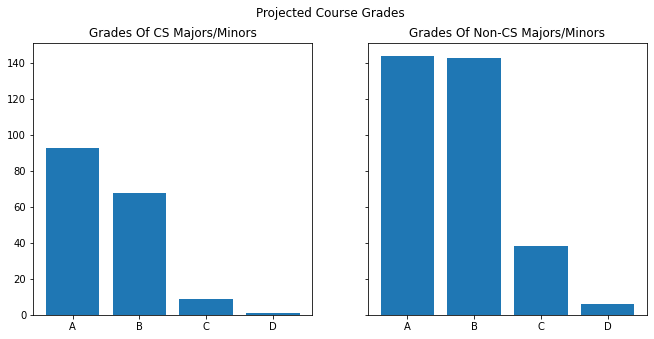

In [160]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharey=True)
fig.suptitle("Projected Course Grades")


axes[0].set_title("Grades Of CS Majors/Minors")
axes[0].bar(grade_dict.keys(), grade_dict.values())
axes[0].tick_params(axis='x', labelrotation = 0)

axes[1].set_title("Grades Of Non-CS Majors/Minors")
axes[1].bar(not_cs_grade_dict.keys(), not_cs_grade_dict.values())

### In this other graph, we can see the counts for the percieved final grade of people from both categories (CS and non-CS).

In irder to make this graph, I had to write a function to get the proportions of each letter category by dividing the number of people who chose any specific grade by the total number of people who are in the category (CS or not CS).

{'A': 54.39, 'B': 39.77, 'C': 5.26, 'D': 0.58}
{'A': 43.5, 'B': 43.2, 'C': 11.48, 'D': 1.81}


<BarContainer object of 4 artists>

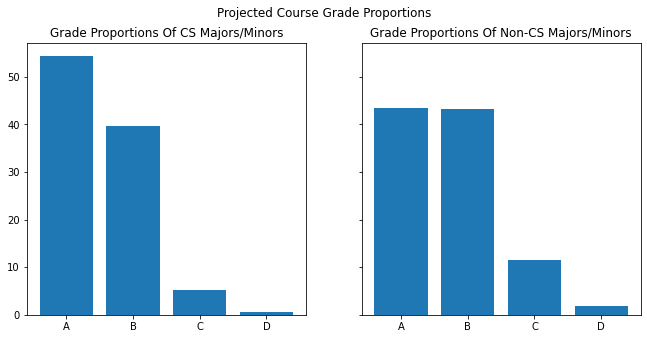

In [161]:
def proportion(grades: dict[str, int], total: int) -> dict[str, float]:
    prop: dict[str, float] = {}
    for item in grades:
        new: float = round((grades[item] / total) * 100, 2)
        prop[item] = new
    return prop

cs_prop: dict[str, float] = proportion(grade_dict, interest[True])
not_cs_prop: dict[str, float] = proportion(not_cs_grade_dict, interest[False])
print(cs_prop)
print(not_cs_prop)

fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharey=True)
fig.suptitle("Projected Course Grade Proportions")


axes[0].set_title("Grade Proportions Of CS Majors/Minors")
axes[0].bar(cs_prop.keys(), cs_prop.values())
axes[0].tick_params(axis='x', labelrotation = 0)

axes[1].set_title("Grade Proportions Of Non-CS Majors/Minors")
axes[1].bar(not_cs_prop.keys(), not_cs_prop.values())